This notebook is strictly for modeling and keeping track of thechanges I make per model/ what changes improve the accuracy/reduces overfitting the most

In [1]:
#imports 
import os, shutil
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from tensorflow.keras import regularizers
import seaborn as sns
import tensorflow as tf
from keras.callbacks import EarlyStopping

In [2]:
score_dictionary = {}

In [3]:
# strings of directories for the different data
train_images_dir = 'C:/Users/User/Documents/Flatiron/Capstone/train_data_guns'
test_images_dir = 'C:/Users/User/Documents/Flatiron/Capstone/test_data_guns'

In [4]:
global_target_size = (127,127)
global_batch_size = 32
global_epochs = 45

In [5]:
train_val_generator = ImageDataGenerator(rescale=1./255,
                                         validation_split = .25)

In [6]:
train_data = train_val_generator.flow_from_directory(train_images_dir,  
                                                     target_size = global_target_size,
                                                     subset='training',
                                                     batch_size=global_batch_size,
                                                     class_mode='binary',
                                                    shuffle = True,
                                                    seed = 100)

Found 974 images belonging to 2 classes.


In [7]:
val_data = train_val_generator.flow_from_directory(train_images_dir,
       subset = 'validation',  
       target_size = global_target_size,
       batch_size=global_batch_size,
       class_mode='binary',
       seed = 100)

Found 323 images belonging to 2 classes.


In [8]:
test_generator = ImageDataGenerator(rescale=1./255)
test_data = test_generator.flow_from_directory(
        test_images_dir,  
        target_size = global_target_size,
        batch_size=global_batch_size,
        class_mode='binary',
        shuffle= False)

Found 243 images belonging to 2 classes.


In [117]:
es = EarlyStopping(monitor='acc', mode='max', patience=20)

### CNN 1 - Baseline

The baseline model is comprised of 

stack 1 - 1 Conv2d layer with 32 nodes, relu activation, (3,3) kernel size, 1 max pooling later with (2,2) pool size

stack 2 - 1 Conv2d layer with 32 nodes, relu activation, (4,4) kernel size, 1 max pooling layer with (2,2) pool size

stack 3 - 1 Conv2D layer with 64 nodes, relu activation, (3,3) kernel size, 1 max pooling later with (2,2) pool size

flattening layer - layer that flattens the tensor into a 1D array to be fed into the dense layers

Dense Layer 1 - Dense layer with 64 nodes and relu activation 

Dense Layer 2 - output layer with sigmoid activation

In [9]:
# baseline = models.Sequential()

# # stack 1
# baseline.add(layers.Conv2D(32, (3, 3), activation='relu',
#                         input_shape=(global_target_size[0], global_target_size[0],  3)))
# baseline.add(layers.MaxPooling2D((2, 2)))

# # stack 2
# baseline.add(layers.Conv2D(32, (4, 4), activation='relu'))
# baseline.add(layers.MaxPooling2D((2, 2)))

# # stack 3
# baseline.add(layers.Conv2D(64, (3, 3), activation='relu'))
# baseline.add(layers.MaxPooling2D((2, 2)))

# # flattening layer
# baseline.add(layers.Flatten())

# # Dense Layer 1 
# baseline.add(layers.Dense(64, activation='relu'))

# # Dense Layer 2 // output layer
# baseline.add(layers.Dense(1, activation='sigmoid'))


# ## Compiling baseline 
# baseline.compile(loss='binary_crossentropy',
#               optimizer="sgd",
#               metrics=['acc'])

In [10]:
# baseline_history = baseline.fit(train_data,
#                     epochs=global_epochs,
#                     validation_data = val_data
#                    )

Epoch 1/45
31/31 [==============================] - 49s 2s/step - loss: 0.6914 - acc: 0.5287 - val_loss: 0.6814 - val_acc: 0.5325
Epoch 2/45
31/31 [==============================] - 45s 1s/step - loss: 0.6850 - acc: 0.5667 - val_loss: 0.6778 - val_acc: 0.5666
Epoch 3/45
31/31 [==============================] - 45s 1s/step - loss: 0.6798 - acc: 0.5770 - val_loss: 0.6737 - val_acc: 0.6130
Epoch 4/45
31/31 [==============================] - 44s 1s/step - loss: 0.6723 - acc: 0.6037 - val_loss: 0.6673 - val_acc: 0.6192
Epoch 5/45
31/31 [==============================] - 44s 1s/step - loss: 0.6658 - acc: 0.6160 - val_loss: 0.6633 - val_acc: 0.6068
Epoch 6/45
31/31 [==============================] - 45s 1s/step - loss: 0.6589 - acc: 0.6057 - val_loss: 0.6584 - val_acc: 0.6409
Epoch 7/45
31/31 [==============================] - 44s 1s/step - loss: 0.6481 - acc: 0.6314 - val_loss: 0.6524 - val_acc: 0.6285
Epoch 8/45
31/31 [==============================] - 44s 1s/step - loss: 0.6400 - acc: 0.64

In [11]:
# baseline_train_results = baseline.evaluate(train_data)
# baseline_train_results

31/31 [==============================] - 34s 1s/step - loss: 0.2253 - acc: 0.9374


[0.2252783328294754, 0.9373716711997986]

In [12]:
# baseline_val_results = baseline.evaluate(val_data)
# baseline_val_results

11/11 [==============================] - 7s 658ms/step - loss: 0.6225 - acc: 0.7214


[0.6224871873855591, 0.7213622331619263]

In [13]:
# score_dictionary['baseline'] =  (baseline_train_results,baseline_val_results)

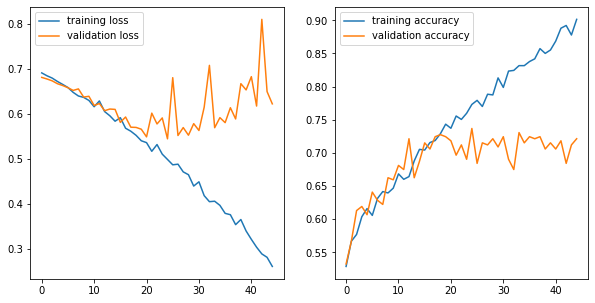

In [14]:
# # visualizing loss and accuracy per epoch
# baseline_train_loss = baseline_history.history['loss']
# baseline_train_acc = baseline_history.history['acc']
# baseline_val_loss = baseline_history.history['val_loss']
# baseline_val_acc = baseline_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=baseline_history.epoch, y=baseline_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=baseline_history.epoch, y=baseline_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=baseline_history.epoch, y=baseline_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=baseline_history.epoch, y=baseline_val_acc, ax=ax2, label='validation accuracy');

<b> For baseline scores: </b>
* Training Loss : 0.6225
* Training Accuracy : 0.9374
* Validation Loss : 0.6225
* Validation Accuracy : 0.7214

<b> Baseline Model Notes: </b> The baseline model is ok. Though accuracy is not where I would like it to be, its a good starting point.

<b> Independent Learning </b><br>
For a lot of my model iterations, my goal for the model is to reduce overfitting. You will see as you dive deeper into the notebook that some things worked, and some didn't. What works and what doesn't highly depends on your data and the problem you're trying to solve.

Below are some of the outside sources I learned and drew iteration change ideas from:


[Deep Learning #3: More on CNNs & Handling Overfitting by Rutger Ruizendaal](https://towardsdatascience.com/deep-learning-3-more-on-cnns-handling-overfitting-2bd5d99abe5d)<br>
Main Ideas: 
 - Add more data
 - Use data augmentation
 - Use architectures that generalize well
 - Add regularization (mostly dropout, L1/L2 regularization are also possible)
 - Reduce architecture complexity.
 
[How to Treat Overfitting in Convolutional Neural Networks by Erica Gabriel](https://www.analyticsvidhya.com/blog/2020/09/overfitting-in-cnn-show-to-treat-overfitting-in-convolutional-neural-networks/)
<br>Main Ideas: 
 - Regularization
 - Weight Initialization
 - Dropout Regularization
 - Weight Constraints
 
[Tricks to prevent overfitting in cnn model trained on a small dataset by medium user @Jinwen](https://jinwen17.medium.com/tricks-to-prevent-overfitting-in-cnn-model-trained-on-a-small-dataset-b84f05eb4eb7)
<br>Main Ideas: 
 - Shuffling and Splitting the Data 
 - Regularization
 - Dropout 
 - Data Augmentation
 
[5 Techniques to Prevent Overfitting in Neural Networks by Abhinav Sagar](https://www.kdnuggets.com/2019/12/5-techniques-prevent-overfitting-neural-networks.html)
<br>Main Ideas: 
 - Simplify the Model
 - Implement Early Stopping
 - Data Augmentation
 - Use Regularization 
 - Use Dropout Layers
 


### CNN Model - Iteration 1

For this Iteration I am trying to increase both the validation and training acuracy score. <br>

Changes Made: 
- removed the third stack (Convolutional layer followed by a Max Pooling layer
- added 2 Dense layers and 2 Dropout layers

In [15]:
# model1 = models.Sequential()

# # stack 1
# model1.add(layers.Conv2D(32, (3, 3), activation='relu',
#                         input_shape=(global_target_size[0], global_target_size[0],  3)))
# model1.add(layers.MaxPooling2D((2, 2)))

# # stack 2
# model1.add(layers.Conv2D(32, (4, 4), activation='relu'))
# model1.add(layers.MaxPooling2D((2, 2)))


# # flattening layer
# model1.add(layers.Flatten())

# # Dense Layer 1 
# model1.add(layers.Dense(32, activation='relu'))

# # Dense Dropout layer 1 
# model1.add(layers.Dropout(.25))

# # Dense Layer 2 
# model1.add(layers.Dense(64, activation='relu'))

# # Dense Dropout Layer 2
# model1.add(layers.Dropout(.5))

# # Dense Layer 3
# model1.add(layers.Dense(32, activation='relu'))

# # Dense Layer 2 // output layer
# model1.add(layers.Dense(1, activation='sigmoid'))


# ## Compiling baseline 
# model1.compile(loss='binary_crossentropy',
#               optimizer="sgd",
#               metrics=['acc'])

In [16]:
# model1_history = model1.fit(train_data,
#                     epochs=global_epochs,
#                     validation_data = val_data
#                    )

Epoch 1/45
31/31 [==============================] - 56s 2s/step - loss: 0.6917 - acc: 0.5021 - val_loss: 0.6869 - val_acc: 0.5294
Epoch 2/45
31/31 [==============================] - 55s 2s/step - loss: 0.6940 - acc: 0.5113 - val_loss: 0.6894 - val_acc: 0.5263
Epoch 3/45
31/31 [==============================] - 55s 2s/step - loss: 0.6927 - acc: 0.4908 - val_loss: 0.6899 - val_acc: 0.5325
Epoch 4/45
31/31 [==============================] - 57s 2s/step - loss: 0.6914 - acc: 0.5339 - val_loss: 0.6926 - val_acc: 0.5015
Epoch 5/45
31/31 [==============================] - 57s 2s/step - loss: 0.6908 - acc: 0.5329 - val_loss: 0.6904 - val_acc: 0.5697
Epoch 6/45
31/31 [==============================] - 54s 2s/step - loss: 0.6891 - acc: 0.5277 - val_loss: 0.6871 - val_acc: 0.6254
Epoch 7/45
31/31 [==============================] - 55s 2s/step - loss: 0.6852 - acc: 0.5657 - val_loss: 0.6882 - val_acc: 0.5851
Epoch 8/45
31/31 [==============================] - 54s 2s/step - loss: 0.6817 - acc: 0.59

In [17]:
# model_1_train_results = model1.evaluate(train_data)
# model_1_train_results

# model_1_val_results = model1.evaluate(val_data)
# model_1_val_results

11/11 [==============================] - 6s 544ms/step - loss: 0.6160 - acc: 0.6254


[0.6159648895263672, 0.6253870129585266]

In [18]:
# score_dictionary['model 1'] = (model_1_train_results,model_1_val_results)

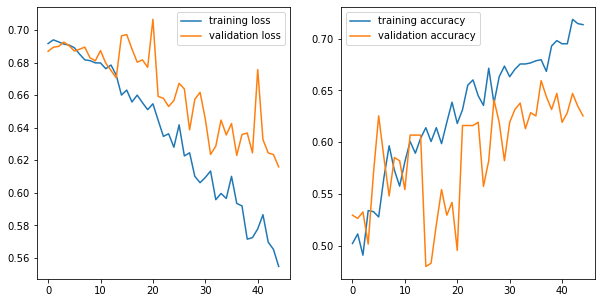

In [19]:
# # visualizing loss and accuracy per epoch
# model1_train_loss = model1_history.history['loss']
# model1_train_acc = model1_history.history['acc']
# model1_val_loss = model1_history.history['val_loss']
# model1_val_acc = model1_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model1_history.epoch, y=model1_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model1_history.epoch, y=model1_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model1_history.epoch, y=model1_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model1_history.epoch, y=model1_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 1 Scores: </b>
* Training Loss : 0.5296
* Training Accuracy : 0.7556
* Validation Loss : 0.6160
* Validation Accuracy : 0.6254

<b> Notes: </b> The changes made in this iteration did not work for my model. It decreased both my accuracy and validation score.
***

### CNN Model - Iteration 2

For this Iteration I am trying to increase both the validation and training acuracy score. <br>

Changes Made: 
- reverted to the baseline, and made changes to that model again
- change the Max Pooling layer stride to (2,2) instead of the default of None

Changing the max pooling stride from None to (2,2) will have the max pooling filter move down the image by 2 pixels each pass instead of looking at every single pixel. This is a form of dimensionality reduction because it will decrease the size of the matrix we are working with. 

In [118]:
# model2 = models.Sequential()

# # stack 1
# model2.add(layers.Conv2D(32, (3, 3), activation='relu',
#                         input_shape=(global_target_size[0], global_target_size[0],  3)))
# model2.add(layers.MaxPooling2D((2, 2),
#                         strides = (2,2)))

# # stack 2
# model2.add(layers.Conv2D(32, (4, 4), activation='relu',strides = (2,2)))
# model2.add(layers.MaxPooling2D((2, 2),
#                         strides = (2,2)))

# # stack 3
# model2.add(layers.Conv2D(64, (3, 3), activation='relu',strides = (2,2)))
# model2.add(layers.MaxPooling2D((2, 2),
#                         strides = (2,2)))

# # flattening layer
# model2.add(layers.Flatten())

# # Dense Layer 1 
# model2.add(layers.Dense(64, activation='relu'))

# # Dense Layer 2 // output layer
# model2.add(layers.Dense(1, activation='sigmoid'))


# ## Compiling baseline 
# model2.compile(loss='binary_crossentropy',
#               optimizer="sgd",
#               metrics=['acc'])

In [119]:
# model2_history = model2.fit(train_data,
#                     epochs=300,
#                     validation_data = val_data
                            
#                    )

Epoch 1/300
31/31 [==============================] - 39s 1s/step - loss: 0.6942 - acc: 0.4928 - val_loss: 0.6897 - val_acc: 0.5511
Epoch 2/300
31/31 [==============================] - 38s 1s/step - loss: 0.6909 - acc: 0.5359 - val_loss: 0.6878 - val_acc: 0.5325
Epoch 3/300
31/31 [==============================] - 38s 1s/step - loss: 0.6891 - acc: 0.5267 - val_loss: 0.6881 - val_acc: 0.5635
Epoch 4/300
31/31 [==============================] - 38s 1s/step - loss: 0.6890 - acc: 0.5339 - val_loss: 0.6858 - val_acc: 0.5573
Epoch 5/300
31/31 [==============================] - 37s 1s/step - loss: 0.6878 - acc: 0.5400 - val_loss: 0.6843 - val_acc: 0.5449
Epoch 6/300
31/31 [==============================] - 37s 1s/step - loss: 0.6867 - acc: 0.5483 - val_loss: 0.6831 - val_acc: 0.5604
Epoch 7/300
31/31 [==============================] - 39s 1s/step - loss: 0.6863 - acc: 0.5462 - val_loss: 0.6822 - val_acc: 0.5728
Epoch 8/300
31/31 [==============================] - 37s 1s/step - loss: 0.6852 - a

Epoch 125/300
31/31 [==============================] - 38s 1s/step - loss: 0.1171 - acc: 0.9610 - val_loss: 1.3413 - val_acc: 0.6625
Epoch 126/300
31/31 [==============================] - 38s 1s/step - loss: 0.1025 - acc: 0.9702 - val_loss: 1.3568 - val_acc: 0.6316
Epoch 127/300
31/31 [==============================] - 38s 1s/step - loss: 0.1313 - acc: 0.9548 - val_loss: 1.0938 - val_acc: 0.6780
Epoch 128/300
31/31 [==============================] - 38s 1s/step - loss: 0.0672 - acc: 0.9887 - val_loss: 1.2000 - val_acc: 0.6625
Epoch 129/300
31/31 [==============================] - 37s 1s/step - loss: 0.1215 - acc: 0.9630 - val_loss: 1.0862 - val_acc: 0.7028
Epoch 130/300
31/31 [==============================] - 37s 1s/step - loss: 0.0734 - acc: 0.9846 - val_loss: 1.1460 - val_acc: 0.6811
Epoch 131/300
31/31 [==============================] - 38s 1s/step - loss: 0.0897 - acc: 0.9702 - val_loss: 1.4410 - val_acc: 0.6749
Epoch 132/300
31/31 [==============================] - 38s 1s/step - 

In [122]:
# model_2_train_results = model2.evaluate(train_data)
# model_2_train_results

# model_2_val_results = model2.evaluate(val_data)
# model_2_val_results

11/11 [==============================] - 6s 542ms/step - loss: 1.8497 - acc: 0.6811


[1.8496811389923096, 0.6811145544052124]

In [23]:
# score_dictionary['model 2'] = (model_2_train_results,model_2_val_results)

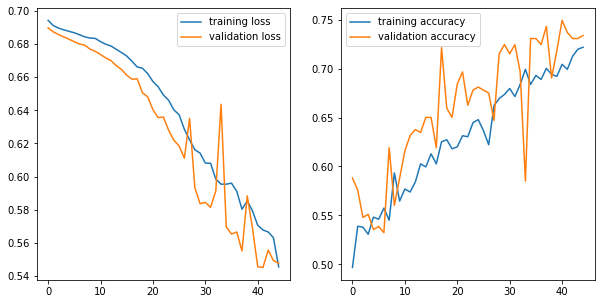

In [24]:
# # visualizing loss and accuracy per epoch
# model2_train_loss = model2_history.history['loss']
# model2_train_acc = model2_history.history['acc']
# model2_val_loss = model2_history.history['val_loss']
# model2_val_acc = model2_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model2_history.epoch, y=model2_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model2_history.epoch, y=model2_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model2_history.epoch, y=model2_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model2_history.epoch, y=model2_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 2 Scores: </b>
* Training Loss : 0.0051
* Training Accuracy : 1.0000
* Validation Loss : 1.8497
* Validation Accuracy : 0.6811 
***

### CNN Model Iteration 3

For this Iteration I am trying to increase both the validation and training acuracy score. <br>

Changes Made: 
- Increase the amount of 2D Convolutional Layers

Adding more Convolutional layers will hopefully allow my model to capture more about the image. 

In [25]:
# model3 = models.Sequential()

# # Stack 1
# model3.add(layers.Conv2D(filters = 32,
#                          kernel_size=(3,3),
#                          activation='relu',
#                          input_shape = (global_target_size[0],global_target_size[0], 3)
#                         ))
# model3.add(layers.MaxPooling2D(pool_size = (2, 2)))

# # Stack 2
# model3.add(layers.Conv2D(32, (4, 4), activation='relu'))
# model3.add(layers.MaxPooling2D((2, 2)))

# # Stack 3
# model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model3.add(layers.MaxPooling2D((2, 2)))

# # Stack 4
# model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model3.add(layers.MaxPooling2D((2, 2)))

# # Flattening layer
# model3.add(layers.Flatten())

# # Dense layer 1
# model3.add(layers.Dense(64, activation='relu'))

# # Dense layer 2 - output layer
# model3.add(layers.Dense(1, activation='sigmoid'))

# model3.compile(loss='binary_crossentropy',
#               optimizer = 'adam',
#               metrics=['acc'])

In [26]:
# model3_history = model3.fit(train_data,
#                     epochs=global_epochs,
#                     validation_data = val_data
#                    )

Epoch 1/45
31/31 [==============================] - 46s 1s/step - loss: 0.6927 - acc: 0.5062 - val_loss: 0.6775 - val_acc: 0.4768
Epoch 2/45
31/31 [==============================] - 46s 1s/step - loss: 0.6600 - acc: 0.6006 - val_loss: 0.5509 - val_acc: 0.7276
Epoch 3/45
31/31 [==============================] - 46s 1s/step - loss: 0.6143 - acc: 0.6694 - val_loss: 0.5300 - val_acc: 0.7988
Epoch 4/45
31/31 [==============================] - 45s 1s/step - loss: 0.5516 - acc: 0.7361 - val_loss: 0.6006 - val_acc: 0.6842
Epoch 5/45
31/31 [==============================] - 45s 1s/step - loss: 0.5176 - acc: 0.7444 - val_loss: 0.4903 - val_acc: 0.8019
Epoch 6/45
31/31 [==============================] - 45s 1s/step - loss: 0.4540 - acc: 0.8008 - val_loss: 0.5131 - val_acc: 0.7554
Epoch 7/45
31/31 [==============================] - 45s 1s/step - loss: 0.4026 - acc: 0.8316 - val_loss: 0.6584 - val_acc: 0.6904
Epoch 8/45
31/31 [==============================] - 44s 1s/step - loss: 0.3451 - acc: 0.84

In [27]:
# model_3_train_results = model3.evaluate(train_data)
# model_3_train_results

# model_3_val_results = model3.evaluate(val_data)
# model_3_val_results

11/11 [==============================] - 6s 550ms/step - loss: 1.7566 - acc: 0.7802


[1.7566325664520264, 0.7801857590675354]

In [28]:
# score_dictionary['model 3'] = (model_3_train_results,model_3_val_results)

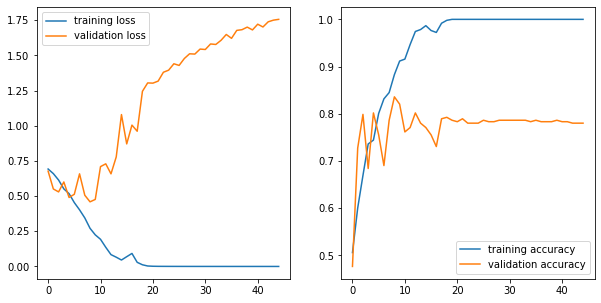

In [29]:
# # visualizing loss and accuracy per epoch
# model3_train_loss = model3_history.history['loss']
# model3_train_acc = model3_history.history['acc']
# model3_val_loss = model3_history.history['val_loss']
# model3_val_acc = model3_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model3_history.epoch, y=model3_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model3_history.epoch, y=model3_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model3_history.epoch, y=model3_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model3_history.epoch, y=model3_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 3 Scores: </b>
* Training Loss : 6.5902e-05
* Training Accuracy : 1.0000
* Validation Loss : 1.7566
* Validation Accuracy : 0.7802

<b> Notes: </b> The changes made in this iteration worked for my training data, but not my validation data. We want the model to work well on both the training data and the validation data. This is because validation data is supposed to represent unseen data. These scores are telling me that these changes did work, however my model is very overfit. So, from now on I will work on reducing the overfitting of my model.
***

### CNN Model Iteration 4

Changes Made: 
- Increasing the amount of filter in each 2D Convolutional Layer

For this Iteration, I am going to be honest I don't really know why I did what I did. My model is really overfit, yet I am increasing the number of filters in each convolutional layer. This will surely make my model more overfit.

In [30]:
#  model4 = models.Sequential()

# # Stack 1
# model4.add(layers.Conv2D(filters = 64,
#                          kernel_size=(3,3),
#                          activation='relu',
#                          input_shape = (global_target_size[0],global_target_size[0], 3)
#                         ))
# model4.add(layers.MaxPooling2D(pool_size = (2, 2)))

# # Stack 2
# model4.add(layers.Conv2D(64, (4, 4), activation='relu'))
# model4.add(layers.MaxPooling2D((2, 2)))

# # Stack 3
# model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model4.add(layers.MaxPooling2D((2, 2)))

# # Stack 4
# model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model4.add(layers.MaxPooling2D((2, 2)))

# # Flattening layer
# model4.add(layers.Flatten())

# # Dense layer 1
# model4.add(layers.Dense(64, activation='relu'))

# # Dense layer 2 - output layer
# model4.add(layers.Dense(1, activation='sigmoid'))

# model4.compile(loss='binary_crossentropy',
#               optimizer = 'adam',
#               metrics=['acc'])

In [31]:
# model4_history = model4.fit(train_data,
#                     epochs=global_epochs,
#                     validation_data = val_data
#                    )

Epoch 1/45
31/31 [==============================] - 62s 2s/step - loss: 0.6955 - acc: 0.5175 - val_loss: 0.6797 - val_acc: 0.5232
Epoch 2/45
31/31 [==============================] - 63s 2s/step - loss: 0.6777 - acc: 0.5986 - val_loss: 0.6682 - val_acc: 0.6409
Epoch 3/45
31/31 [==============================] - 63s 2s/step - loss: 0.6251 - acc: 0.6889 - val_loss: 0.5669 - val_acc: 0.7647
Epoch 4/45
31/31 [==============================] - 73s 2s/step - loss: 0.5569 - acc: 0.7351 - val_loss: 0.5016 - val_acc: 0.8359
Epoch 5/45
31/31 [==============================] - 69s 2s/step - loss: 0.5229 - acc: 0.7587 - val_loss: 0.5256 - val_acc: 0.7678
Epoch 6/45
31/31 [==============================] - 64s 2s/step - loss: 0.4713 - acc: 0.7834 - val_loss: 0.4478 - val_acc: 0.7895
Epoch 7/45
31/31 [==============================] - 63s 2s/step - loss: 0.4476 - acc: 0.8008 - val_loss: 0.4556 - val_acc: 0.7616
Epoch 8/45
31/31 [==============================] - 63s 2s/step - loss: 0.3791 - acc: 0.83

In [32]:
# model_4_train_results = model4.evaluate(train_data)
# model_4_train_results

# model_4_val_results = model4.evaluate(val_data)
# model_4_val_results

11/11 [==============================] - 7s 662ms/step - loss: 1.5266 - acc: 0.8390


[1.5266472101211548, 0.8390092849731445]

In [33]:
# score_dictionary['model 4'] = (model_4_train_results,model_4_val_results)

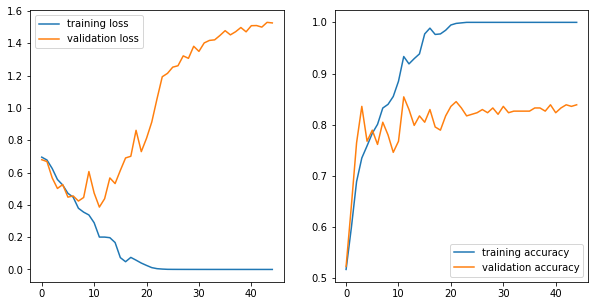

In [34]:
# # visualizing loss and accuracy per epoch
# model4_train_loss = model4_history.history['loss']
# model4_train_acc = model4_history.history['acc']
# model4_val_loss = model4_history.history['val_loss']
# model4_val_acc = model4_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model4_history.epoch, y=model4_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model4_history.epoch, y=model4_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model4_history.epoch, y=model4_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model4_history.epoch, y=model4_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 4 Scores: </b>
* Training Loss : 3.6252e-05
* Training Accuracy : 1.0000
* Validation Loss : 1.5266
* Validation Accuracy : 0.8390

<b> Notes: </b> The changes I made in this model actually decreased my training loss, and increased my validation accuracy. This is a good step, however, my model is still overfit.
***

### CNN Model Iteration 5

For this Iteration my main goal is to continue reducing overfitting. <br>

Changes Made: 
- Increase the amount of 2D Convolutional Layers
- Increasing the amount of filters

Adding more Convolutional layers will hopefully allow my model to capture more about the image. 

In [35]:
# model5 = models.Sequential()

# # Stack 1
# model5.add(layers.Conv2D(filters = 64,
#                          kernel_size=(3,3),
#                          activation='relu',
#                          input_shape = (global_target_size[0],global_target_size[0], 3),
#                          padding = 'same'
#                         ))
# model5.add(layers.MaxPooling2D(pool_size = (4,4),
#                          padding = 'same'))

# # Stack 2
# model5.add(layers.Conv2D(32, (3,3), activation='relu',padding = 'same'))
# model5.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Stack 3
# model5.add(layers.Conv2D(64, (4,4), activation='relu'))
# model5.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Stack 4
# model5.add(layers.Conv2D(128, (3,3), activation='relu',padding='same'))
# model5.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Stack 5
# model5.add(layers.Conv2D(128, (4,4), activation='relu',padding = 'same'))
# model5.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Stack 5
# model5.add(layers.Conv2D(256, (4,4), activation='relu',padding = 'same'))
# model5.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Flattening layer
# model5.add(layers.Flatten())

# # Dense layer 1
# model5.add(layers.Dense(64, activation='relu'))

# # Dense layer 2 - output layer
# model5.add(layers.Dense(1, activation='sigmoid'))

# model5.compile(loss='binary_crossentropy',
#               optimizer = 'adam',
#               metrics=['acc'])

In [36]:
# model5_history = model5.fit(train_data,
#                     epochs=global_epochs,
#                     validation_data = val_data
#                    )

Epoch 1/45
31/31 [==============================] - 44s 1s/step - loss: 0.6943 - acc: 0.5010 - val_loss: 0.6923 - val_acc: 0.5511
Epoch 2/45
31/31 [==============================] - 44s 1s/step - loss: 0.6921 - acc: 0.5329 - val_loss: 0.6920 - val_acc: 0.5232
Epoch 3/45
31/31 [==============================] - 44s 1s/step - loss: 0.6923 - acc: 0.5226 - val_loss: 0.6919 - val_acc: 0.5232
Epoch 4/45
31/31 [==============================] - 44s 1s/step - loss: 0.6910 - acc: 0.5226 - val_loss: 0.6809 - val_acc: 0.5232
Epoch 5/45
31/31 [==============================] - 43s 1s/step - loss: 0.6734 - acc: 0.5688 - val_loss: 0.6062 - val_acc: 0.6625
Epoch 6/45
31/31 [==============================] - 43s 1s/step - loss: 0.6081 - acc: 0.6766 - val_loss: 0.4756 - val_acc: 0.7988
Epoch 7/45
31/31 [==============================] - 43s 1s/step - loss: 0.5859 - acc: 0.7043 - val_loss: 0.4706 - val_acc: 0.7771
Epoch 8/45
31/31 [==============================] - 44s 1s/step - loss: 0.5309 - acc: 0.73

In [37]:
# model_5_train_results = model5.evaluate(train_data)
# model_5_train_results

# model_5_val_results = model5.evaluate(val_data)
# model_5_val_results

11/11 [==============================] - 6s 548ms/step - loss: 1.5002 - acc: 0.8204


[1.5002049207687378, 0.8204334378242493]

In [38]:
# score_dictionary['model 5'] = (model_5_train_results,model_5_val_results)

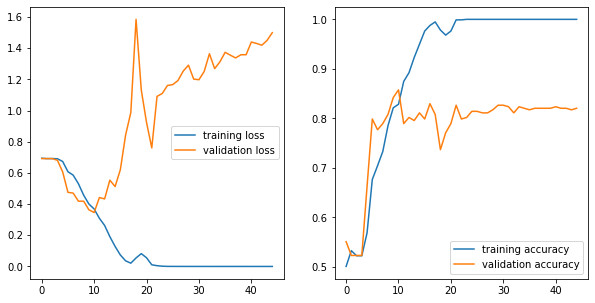

In [39]:
# # visualizing loss and accuracy per epoch
# model5_train_loss = model5_history.history['loss']
# model5_train_acc = model5_history.history['acc']
# model5_val_loss = model5_history.history['val_loss']
# model5_val_acc = model5_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model5_history.epoch, y=model5_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model5_history.epoch, y=model5_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model5_history.epoch, y=model5_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model5_history.epoch, y=model5_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 5 Scores: </b>
* Training Loss : 6.8078e-06
* Training Accuracy : 1.0000
* Validation Loss : 1.5002
* Validation Accuracy : 0.8204

<b> Notes: </b> Both of my Loss values decreased.
***

### CNN Model Iteration 6

CNN Iteration 6 was removed because it did not help the model at all.

### CNN Model Iteration 7

For this Iteration my main goal is to continue reducing overfitting. <br>

Changes Made: 
- Reusing Model 3's Architecture
- Using a learning rate of .0001 for the adam optimizer when compiling

<b> CNN 7 Notes: </b> The adam optimizer is a further extension of stochastic gradient descent to update network weights during training. Unlike maintaining a single learning rate through training in SGD, Adam optimizer updates the learning rate for each network weight individually. I also decreased the value of the learning rate in order to ensure that the optimizer is finding the global minimums.
[More on Optimizers](https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/#:~:text=Adam%20Deep%20Learning%20Optimizer&text=This%20optimization%20algorithm%20is%20a,for%20each%20network%20weight%20individually.)


In [46]:
# adam_opt_0001 = tf.keras.optimizers.Adam(
#     learning_rate=0.0001)

In [47]:
# model7 = models.Sequential()

# # Stack 1
# model7.add(layers.Conv2D(filters = 32,
#                          kernel_size=(3,3),
#                          activation='relu',
#                          input_shape = (global_target_size[0],global_target_size[0], 3)
#                         ))
# model7.add(layers.MaxPooling2D(pool_size = (2, 2)))

# # Stack 2
# model7.add(layers.Conv2D(32, (4, 4), activation='relu'))
# model7.add(layers.MaxPooling2D((2, 2)))

# # Stack 3
# model7.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model7.add(layers.MaxPooling2D((2, 2)))

# # Stack 4
# model7.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model7.add(layers.MaxPooling2D((2, 2)))

# # Flattening layer
# model7.add(layers.Flatten())

# # Dense layer 1
# model7.add(layers.Dense(64, activation='relu'))

# # Dense layer 2 - output layer
# model7.add(layers.Dense(1, activation='sigmoid'))

# model7.compile(loss='binary_crossentropy',
#               optimizer = adam_opt_0001,
#               metrics=['acc'])

In [48]:
# model7_history = model7.fit(train_data,
#                     epochs=global_epochs,
#                     validation_data = val_data
#                    )

Epoch 1/45
31/31 [==============================] - 44s 1s/step - loss: 0.6907 - acc: 0.5411 - val_loss: 0.6844 - val_acc: 0.7771
Epoch 2/45
31/31 [==============================] - 44s 1s/step - loss: 0.6837 - acc: 0.5708 - val_loss: 0.6653 - val_acc: 0.7616
Epoch 3/45
31/31 [==============================] - 44s 1s/step - loss: 0.6667 - acc: 0.6222 - val_loss: 0.6172 - val_acc: 0.7183
Epoch 4/45
31/31 [==============================] - 43s 1s/step - loss: 0.6411 - acc: 0.6458 - val_loss: 0.5665 - val_acc: 0.7709
Epoch 5/45
31/31 [==============================] - 43s 1s/step - loss: 0.6069 - acc: 0.6797 - val_loss: 0.5501 - val_acc: 0.7121
Epoch 6/45
31/31 [==============================] - 44s 1s/step - loss: 0.5817 - acc: 0.6951 - val_loss: 0.5245 - val_acc: 0.7307
Epoch 7/45
31/31 [==============================] - 43s 1s/step - loss: 0.5613 - acc: 0.7228 - val_loss: 0.4647 - val_acc: 0.7833
Epoch 8/45
31/31 [==============================] - 43s 1s/step - loss: 0.5426 - acc: 0.74

In [49]:
# model_7_train_results = model7.evaluate(train_data)
# model_7_train_results

# model_7_val_results = model7.evaluate(val_data)
# model_7_val_results

11/11 [==============================] - 6s 527ms/step - loss: 0.4457 - acc: 0.8235


[0.4457009732723236, 0.8235294222831726]

In [50]:
# score_dictionary['model 7'] = (model_7_train_results,model_7_val_results)

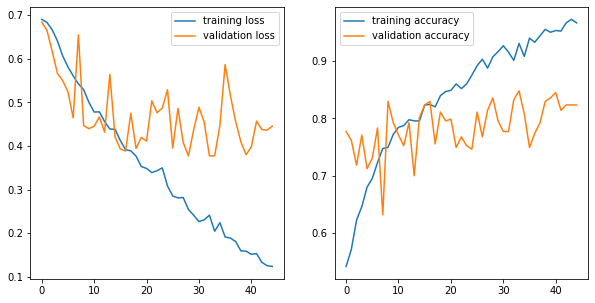

In [51]:
# # visualizing loss and accuracy per epoch
# model7_train_loss = model7_history.history['loss']
# model7_train_acc = model7_history.history['acc']
# model7_val_loss = model7_history.history['val_loss']
# model7_val_acc = model7_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model7_history.epoch, y=model7_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model7_history.epoch, y=model7_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model7_history.epoch, y=model7_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model7_history.epoch, y=model7_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 7 Scores: </b>
* Training Loss : 0.1101
* Training Accuracy : 0.9795
* Validation Loss : 0.4457
* Validation Accuracy : 0.8235

<b> Notes: </b> The only thing that changing the learning rate did to my model was increase the amount of time my model took to run, so from now on I will be using the default learning rate.
***

### CNN Model Iteration 8

For this Iteration my main goal is to continue reducing overfitting. <br>

Changes Made: 
- Reusing Model 3's Architecture
- Adding Kernel Regularizers to all of the 2D Convolutional Layers

<b> Note: </b> Kernel Regularizers tries to reduce the weights of the network (i.e. adds a penalty for high weights) [More Information](https://stats.stackexchange.com/questions/383310/what-is-the-difference-between-kernel-bias-and-activity-regulizers-and-when-t#:~:text=Kernel%20Regularizer%3A%20Tries%20to%20reduce,Wx%2Bb%20is%20smallest.)

In [52]:
# model8 = models.Sequential()

# # Stack 1
# model8.add(layers.Conv2D(filters = 32,
#                          kernel_size=(3,3),
#                          activation='relu',
#                          input_shape = (global_target_size[0],global_target_size[0], 3),
#                          kernel_regularizer = regularizers.L2(0.01)
#                         ))
# model8.add(layers.MaxPooling2D(pool_size = (2, 2)))

# # Stack 2
# model8.add(layers.Conv2D(32, (4, 4), activation='relu',kernel_regularizer = regularizers.L2(0.01)))
# model8.add(layers.MaxPooling2D((2, 2)))

# # Stack 3
# model8.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer = regularizers.L2(0.01)))
# model8.add(layers.MaxPooling2D((2, 2)))

# # Stack 4
# model8.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer = regularizers.L2(0.01)))
# model8.add(layers.MaxPooling2D((2, 2)))

# # Flattening layer
# model8.add(layers.Flatten())

# # Dense layer 1
# model8.add(layers.Dense(64, activation='relu',kernel_regularizer = regularizers.L2(0.01)))

# # Dense layer 2 - output layer
# model8.add(layers.Dense(1, activation='sigmoid'))

# model8.compile(loss='binary_crossentropy',
#               optimizer = 'adam',
#               metrics=['acc'])

In [53]:
# model8_history = model8.fit(train_data,
#                     epochs=global_epochs,
#                     validation_data = val_data
#                    )

Epoch 1/45
31/31 [==============================] - 44s 1s/step - loss: 2.2749 - acc: 0.5164 - val_loss: 1.4557 - val_acc: 0.5542
Epoch 2/45
31/31 [==============================] - 43s 1s/step - loss: 1.1321 - acc: 0.5287 - val_loss: 0.9207 - val_acc: 0.4768
Epoch 3/45
31/31 [==============================] - 44s 1s/step - loss: 0.8346 - acc: 0.5862 - val_loss: 0.7738 - val_acc: 0.5294
Epoch 4/45
31/31 [==============================] - 44s 1s/step - loss: 0.7627 - acc: 0.5452 - val_loss: 0.7422 - val_acc: 0.5387
Epoch 5/45
31/31 [==============================] - 44s 1s/step - loss: 0.7258 - acc: 0.5975 - val_loss: 0.7039 - val_acc: 0.6563
Epoch 6/45
31/31 [==============================] - 44s 1s/step - loss: 0.6868 - acc: 0.6530 - val_loss: 0.6808 - val_acc: 0.6718
Epoch 7/45
31/31 [==============================] - 44s 1s/step - loss: 0.6727 - acc: 0.6540 - val_loss: 0.6828 - val_acc: 0.6378
Epoch 8/45
31/31 [==============================] - 44s 1s/step - loss: 0.6651 - acc: 0.67

In [54]:
# model_8_train_results = model8.evaluate(train_data)
# model_8_train_results

# model_8_val_results = model8.evaluate(val_data)
# model_8_val_results

11/11 [==============================] - 6s 538ms/step - loss: 0.7981 - acc: 0.7276


[0.7981122136116028, 0.727554202079773]

In [55]:
# score_dictionary['model 8'] = (model_8_train_results,model_8_val_results)

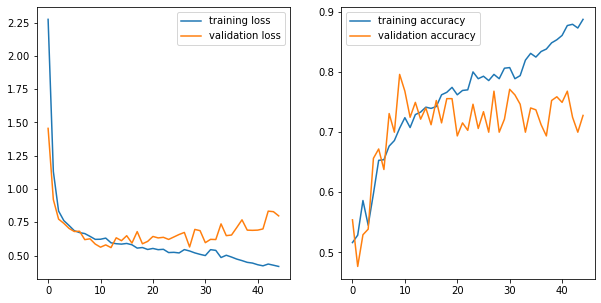

In [56]:
# # visualizing loss and accuracy per epoch
# model8_train_loss = model8_history.history['loss']
# model8_train_acc = model8_history.history['acc']
# model8_val_loss = model8_history.history['val_loss']
# model8_val_acc = model8_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model8_history.epoch, y=model8_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model8_history.epoch, y=model8_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model8_history.epoch, y=model8_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model8_history.epoch, y=model8_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 8 Scores: </b>
* Training Loss : 0.3759
* Training Accuracy : 0.9117
* Validation Loss : 0.7981
* Validation Accuracy : 0.7276
***

### CNN Model Iteration 9 

 not implementing yet
 
 **legend says she never came back to implement iteration 9**
 ***

### CNN Model Iteration 10

For this Iteration my main goal is to continue reducing overfitting. <br>

Changes Made: 
- Reusing Model 1's Architecture
- Chaning kernel initializer to 'glorot uniform'

<b> Note: </b> Glorot uniform kernel initializer draws samples from a uniform distribution

In [57]:
# model10 = models.Sequential()

# # stack 1
# model10.add(layers.Conv2D(32, (3, 3), activation='relu',
#                         input_shape=(global_target_size[0], global_target_size[0],  3),
#                           kernel_initializer='glorot_uniform'))
# model10.add(layers.MaxPooling2D((2, 2)))

# # stack 2
# model10.add(layers.Conv2D(32, (4, 4), activation='relu',
#                           kernel_initializer='glorot_uniform'))
# model10.add(layers.MaxPooling2D((2, 2)))


# # flattening layer
# model10.add(layers.Flatten())

# # Dense Layer 1 
# model10.add(layers.Dense(32, activation='relu'))

# # Dense Dropout layer 1 
# model10.add(layers.Dropout(.25))

# # Dense Layer 2 
# model10.add(layers.Dense(64, activation='relu'))

# # Dense Dropout Layer 2
# model10.add(layers.Dropout(.5))

# # Dense Layer 3
# model10.add(layers.Dense(32, activation='relu'))

# # Dense Layer 2 // output layer
# model10.add(layers.Dense(1, activation='sigmoid'))


# ## Compiling baseline 
# model10.compile(loss='binary_crossentropy',
#               optimizer="adam",
#               metrics=['acc'])

In [58]:
# model10_history = model10.fit(train_data,
#                     epochs=global_epochs,
#                     validation_data = val_data
#                    )

Epoch 1/45
31/31 [==============================] - 43s 1s/step - loss: 0.7068 - acc: 0.5082 - val_loss: 0.6926 - val_acc: 0.5232
Epoch 2/45
31/31 [==============================] - 42s 1s/step - loss: 0.6907 - acc: 0.5534 - val_loss: 0.6765 - val_acc: 0.7554
Epoch 3/45
31/31 [==============================] - 42s 1s/step - loss: 0.6748 - acc: 0.5770 - val_loss: 0.6237 - val_acc: 0.7895
Epoch 4/45
31/31 [==============================] - 42s 1s/step - loss: 0.6316 - acc: 0.6653 - val_loss: 0.6221 - val_acc: 0.7245
Epoch 5/45
31/31 [==============================] - 42s 1s/step - loss: 0.5631 - acc: 0.7444 - val_loss: 0.5603 - val_acc: 0.7616
Epoch 6/45
31/31 [==============================] - 42s 1s/step - loss: 0.4514 - acc: 0.8142 - val_loss: 0.6016 - val_acc: 0.7368
Epoch 7/45
31/31 [==============================] - 42s 1s/step - loss: 0.3607 - acc: 0.8501 - val_loss: 0.5749 - val_acc: 0.7678
Epoch 8/45
31/31 [==============================] - 42s 1s/step - loss: 0.2666 - acc: 0.90

In [59]:
# model_10_train_results = model10.evaluate(train_data)
# model_10_train_results

# model_10_val_results = model10.evaluate(val_data)
# model_10_val_results

11/11 [==============================] - 6s 552ms/step - loss: 2.7100 - acc: 0.6935


[2.7100117206573486, 0.693498432636261]

In [60]:
# score_dictionary['model 10'] = (model_10_train_results,model_10_val_results)

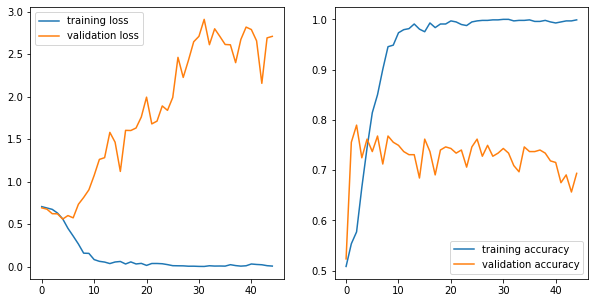

In [61]:
# # visualizing loss and accuracy per epoch
# model10_train_loss = model10_history.history['loss']
# model10_train_acc = model10_history.history['acc']
# model10_val_loss = model10_history.history['val_loss']
# model10_val_acc = model10_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model10_history.epoch, y=model10_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model10_history.epoch, y=model10_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model10_history.epoch, y=model10_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model10_history.epoch, y=model10_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 10 Scores: </b>
* Training Loss : 4.6965e-04
* Training Accuracy : 1.0000
* Validation Loss : 2.7100
* Validation Accuracy : 0.6935

<B> Notes: </b>This change overfit my model incredibly. This change will not be sticking.
***

### CNN Model Iteration 11 

For this Iteration my main goal is to continue reducing overfitting. <br>

Changes Made: 
- Reusing Model 1's Architecture
- Seeing what impact going deeper (more Dense layers) instead of wider (More Convolutional layers with more filters) will have on my model. 
- Adding more dense layers
- Removing some Convolutional layers


In [62]:
# model11 = models.Sequential()

# # stack 1
# model11.add(layers.Conv2D(32, (3, 3), activation='relu',
#                         input_shape=(global_target_size[0], global_target_size[0],  3)))
# model11.add(layers.MaxPooling2D((2, 2)))

# # stack 2
# model11.add(layers.Conv2D(64, (4, 4), activation='relu'))
# model11.add(layers.MaxPooling2D((2, 2)))

# # stack 3
# model11.add(layers.Conv2D(64, (4, 4), activation='relu'))
# model11.add(layers.MaxPooling2D((2, 2)))



# # flattening layer
# model11.add(layers.Flatten())

# # Dense Layer 1 
# model11.add(layers.Dense(64, activation='relu'))

# # Dense Dropout layer 1 
# model11.add(layers.Dropout(.1))

# # Dense Layer 2 
# model11.add(layers.Dense(64, activation='relu'))

# # Dense Dropout Layer 2
# model11.add(layers.Dropout(.25))

# # Dense Layer 3 
# model11.add(layers.Dense(64, activation='relu'))

# # Dense Dropout Layer 3
# model11.add(layers.Dropout(.5))

# # Dense Layer 4
# model11.add(layers.Dense(32, activation='relu'))

# # Dense Layer 5 // output layer
# model11.add(layers.Dense(1, activation='sigmoid'))


# ## Compiling baseline 
# model11.compile(loss='binary_crossentropy',
#               optimizer="adam",
#               metrics=['acc'])

In [63]:
# model11_history = model11.fit(train_data,
#                     epochs=global_epochs,
#                     validation_data = val_data
#                    )

Epoch 1/45
31/31 [==============================] - 49s 2s/step - loss: 0.6980 - acc: 0.4856 - val_loss: 0.6902 - val_acc: 0.5232
Epoch 2/45
31/31 [==============================] - 48s 2s/step - loss: 0.6927 - acc: 0.5185 - val_loss: 0.6911 - val_acc: 0.5232
Epoch 3/45
31/31 [==============================] - 48s 2s/step - loss: 0.6923 - acc: 0.5010 - val_loss: 0.6917 - val_acc: 0.5232
Epoch 4/45
31/31 [==============================] - 48s 2s/step - loss: 0.6946 - acc: 0.5175 - val_loss: 0.6924 - val_acc: 0.5232
Epoch 5/45
31/31 [==============================] - 48s 2s/step - loss: 0.6920 - acc: 0.5226 - val_loss: 0.6898 - val_acc: 0.5232
Epoch 6/45
31/31 [==============================] - 48s 2s/step - loss: 0.6929 - acc: 0.5339 - val_loss: 0.6808 - val_acc: 0.7771
Epoch 7/45
31/31 [==============================] - 48s 2s/step - loss: 0.6792 - acc: 0.5924 - val_loss: 0.6191 - val_acc: 0.7183
Epoch 8/45
31/31 [==============================] - 48s 2s/step - loss: 0.6159 - acc: 0.65

In [64]:
# model_11_train_results = model11.evaluate(train_data)
# model_11_train_results

# model_11_val_results = model11.evaluate(val_data)
# model_11_val_results

11/11 [==============================] - 6s 568ms/step - loss: 1.3043 - acc: 0.7957


[1.3042951822280884, 0.7956656217575073]

In [65]:
# score_dictionary['model 11'] = (model_11_train_results,model_11_val_results)

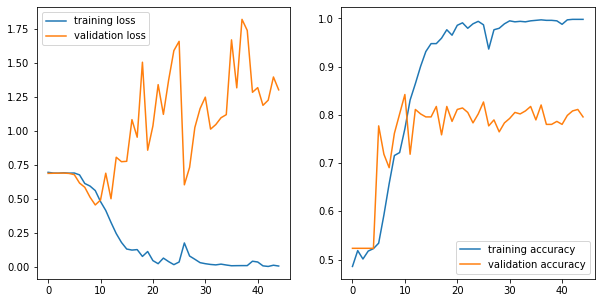

In [66]:
# # visualizing loss and accuracy per epoch
# model11_train_loss = model11_history.history['loss']
# model11_train_acc = model11_history.history['acc']
# model11_val_loss = model11_history.history['val_loss']
# model11_val_acc = model11_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model11_history.epoch, y=model11_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model11_history.epoch, y=model11_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model11_history.epoch, y=model11_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model11_history.epoch, y=model11_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 11 Scores: </b>
* Training Loss : 3.8148e-04
* Training Accuracy : 1.0000
* Validation Loss : 1.3043
* Validation Accuracy : 0.7957


***

### CNN Model Iteration 12

For this Iteration my main goal is to continue reducing overfitting. <br>

Changes Made: 
- Reusing Model 5's Architecture 
- Add dropout layers in between Convolutional Layers

<b> Note: </b> The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. <br>
[Dropout Layer Documentation](https://keras.io/api/layers/regularization_layers/dropout/#:~:text=The%20Dropout%20layer%20randomly%20sets,over%20all%20inputs%20is%20unchanged.)

In [67]:
# model12 = models.Sequential()

# # Stack 1
# model12.add(layers.Conv2D(filters = 64,
#                          kernel_size=(3,3),
#                          activation='relu',
#                          input_shape = (global_target_size[0],global_target_size[0], 3),
#                          padding = 'same'
#                         ))
# model12.add(layers.MaxPooling2D(pool_size = (4,4),
#                          padding = 'same'))

# # Stack 2
# model12.add(layers.Conv2D(32, (3,3), activation='relu',padding = 'same'))
# model12.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))



# # Stack 3
# model12.add(layers.Conv2D(64, (4,4), activation='relu'))
# model12.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))
# # Dropout Layer 1
# model12.add(layers.Dropout(.1))

# # Stack 4
# model12.add(layers.Conv2D(128, (3,3), activation='relu',padding='same'))
# model12.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Dropout Layer 2
# model12.add(layers.Dropout(.25))

# # Stack 5
# model12.add(layers.Conv2D(128, (4,4), activation='relu',padding = 'same'))
# model12.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))
# # Dropout Layer 2
# model12.add(layers.Dropout(.4))

# # Stack 5
# model12.add(layers.Conv2D(256, (4,4), activation='relu',padding = 'same'))
# model12.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))


# # Flattening layer
# model12.add(layers.Flatten())

# # Dense layer 1
# model12.add(layers.Dense(64, activation='relu'))

# # Dense layer 2 - output layer
# model12.add(layers.Dense(1, activation='sigmoid'))

# model12.compile(loss='binary_crossentropy',
#               optimizer = 'adam',
#               metrics=['acc'])

In [68]:
# model12.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 127, 127, 64)      1792      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 13, 13, 64)        32832     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 64)        

In [69]:
# model12_history = model12.fit(train_data,
#                     epochs=global_epochs,
#                     validation_data = val_data
#                    )

Epoch 1/45
31/31 [==============================] - 43s 1s/step - loss: 0.6951 - acc: 0.5133 - val_loss: 0.6931 - val_acc: 0.5975
Epoch 2/45
31/31 [==============================] - 42s 1s/step - loss: 0.6933 - acc: 0.5185 - val_loss: 0.6925 - val_acc: 0.5232
Epoch 3/45
31/31 [==============================] - 42s 1s/step - loss: 0.6925 - acc: 0.5226 - val_loss: 0.6922 - val_acc: 0.5232
Epoch 4/45
31/31 [==============================] - 42s 1s/step - loss: 0.6924 - acc: 0.5226 - val_loss: 0.6888 - val_acc: 0.5232
Epoch 5/45
31/31 [==============================] - 42s 1s/step - loss: 0.6715 - acc: 0.5780 - val_loss: 0.5757 - val_acc: 0.7307
Epoch 6/45
31/31 [==============================] - 42s 1s/step - loss: 0.6353 - acc: 0.6776 - val_loss: 0.4996 - val_acc: 0.7771
Epoch 7/45
31/31 [==============================] - 42s 1s/step - loss: 0.5852 - acc: 0.7094 - val_loss: 0.5005 - val_acc: 0.7678
Epoch 8/45
31/31 [==============================] - 42s 1s/step - loss: 0.5345 - acc: 0.75

In [70]:
# model_12_train_results = model12.evaluate(train_data)
# model_12_train_results

# model_12_val_results = model12.evaluate(val_data)
# model_12_val_results

11/11 [==============================] - 6s 519ms/step - loss: 0.8034 - acc: 0.7926


[0.8033890128135681, 0.792569637298584]

In [71]:
# score_dictionary['model 12'] = (model_12_train_results,model_12_val_results)

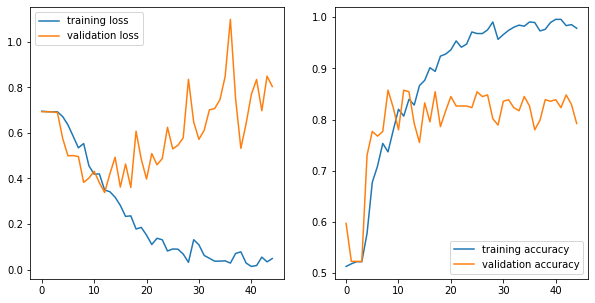

In [72]:
# visualizing loss and accuracy per epoch
# model12_train_loss = model12_history.history['loss']
# model12_train_acc = model12_history.history['acc']
# model12_val_loss = model12_history.history['val_loss']
# model12_val_acc = model12_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model12_history.epoch, y=model12_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model12_history.epoch, y=model12_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model12_history.epoch, y=model12_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model12_history.epoch, y=model12_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 12 Scores: </b>
* Training Loss : 0.0258
* Training Accuracy : 0.9897
* Validation Loss : 0.8034
* Validation Accuracy : 0.7926


***

### CNN Model Iteration 13

For this Iteration my main goal is to continue reducing overfitting. <br>

Changes Made: 
- Reusing Model 12's Architecture 
- Add more dropout layer and increase the intensity


In [73]:
# model13 = models.Sequential()

# # Stack 1
# model13.add(layers.Conv2D(filters = 64,
#                          kernel_size=(3,3),
#                          activation='relu',
#                          input_shape = (global_target_size[0],global_target_size[0], 3),
#                          padding = 'same'
#                         ))
# model13.add(layers.MaxPooling2D(pool_size = (4,4),
#                          padding = 'same'))

# # Dropout Layer 1
# model13.add(layers.Dropout(.1))

# # Stack 2
# model13.add(layers.Conv2D(32, (3,3), activation='relu',padding = 'same'))
# model13.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Dropout Layer 2
# model13.add(layers.Dropout(.15))

# # Stack 3
# model13.add(layers.Conv2D(64, (4,4), activation='relu'))
# model13.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))
# # Dropout Layer 3
# model13.add(layers.Dropout(.2))

# # Stack 4
# model13.add(layers.Conv2D(128, (3,3), activation='relu',padding='same'))
# model13.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Dropout Layer 4
# model13.add(layers.Dropout(.3))

# # Stack 5
# model13.add(layers.Conv2D(128, (4,4), activation='relu',padding = 'same'))
# model13.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))
# # Dropout Layer 5
# model13.add(layers.Dropout(.4))

# # Stack 5
# model13.add(layers.Conv2D(256, (4,4), activation='relu',padding = 'same'))
# model13.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Dropout Layer 6
# model13.add(layers.Dropout(.5))


# # Flattening layer
# model13.add(layers.Flatten())

# # Dense layer 1
# model13.add(layers.Dense(64, activation='relu'))

# # Dense layer 2 - output layer
# model13.add(layers.Dense(1, activation='sigmoid'))

# model13.compile(loss='binary_crossentropy',
#               optimizer = 'adam',
#               metrics=['acc'])

In [74]:
# model13.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 127, 127, 64)      1792      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 13, 13, 64)      

In [75]:
# model13_history = model13.fit(train_data,
#                     epochs=global_epochs,
#                     validation_data = val_data
#                    )

Epoch 1/45
31/31 [==============================] - 44s 1s/step - loss: 0.6952 - acc: 0.5195 - val_loss: 0.6918 - val_acc: 0.5232
Epoch 2/45
31/31 [==============================] - 43s 1s/step - loss: 0.6925 - acc: 0.5318 - val_loss: 0.6840 - val_acc: 0.7492
Epoch 3/45
31/31 [==============================] - 43s 1s/step - loss: 0.6935 - acc: 0.5637 - val_loss: 0.6927 - val_acc: 0.5232
Epoch 4/45
31/31 [==============================] - 43s 1s/step - loss: 0.6931 - acc: 0.5226 - val_loss: 0.6920 - val_acc: 0.5232
Epoch 5/45
31/31 [==============================] - 43s 1s/step - loss: 0.6919 - acc: 0.5226 - val_loss: 0.6888 - val_acc: 0.5232
Epoch 6/45
31/31 [==============================] - 43s 1s/step - loss: 0.6920 - acc: 0.5226 - val_loss: 0.6866 - val_acc: 0.5232
Epoch 7/45
31/31 [==============================] - 43s 1s/step - loss: 0.6749 - acc: 0.5626 - val_loss: 0.6437 - val_acc: 0.6347
Epoch 8/45
31/31 [==============================] - 43s 1s/step - loss: 0.6542 - acc: 0.62

In [76]:
# model_13_train_results = model13.evaluate(train_data)
# model_13_train_results

# model_13_val_results = model13.evaluate(val_data)
# model_13_val_results

11/11 [==============================] - 6s 546ms/step - loss: 0.5010 - acc: 0.8359


[0.5009887218475342, 0.8359133005142212]

In [77]:
# score_dictionary['model 13'] = (model_13_train_results,model_13_val_results)

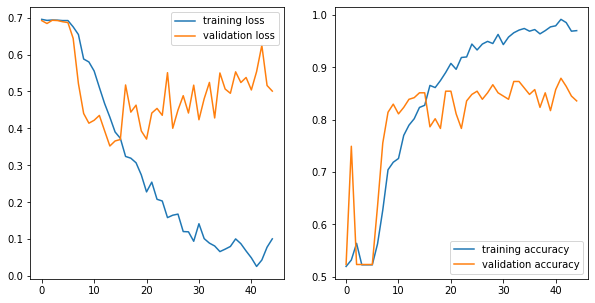

In [78]:
# # visualizing loss and accuracy per epoch
# model13_train_loss = model13_history.history['loss']
# model13_train_acc = model13_history.history['acc']
# model13_val_loss = model13_history.history['val_loss']
# model13_val_acc = model13_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model13_history.epoch, y=model13_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model13_history.epoch, y=model13_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model13_history.epoch, y=model13_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model13_history.epoch, y=model13_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 13 Scores: </b>
* Training Loss : 0.0469
* Training Accuracy : 0.9867
* Validation Loss : 0.5010
* Validation Accuracy : 0.8359

***

### CNN Model Iteration 14

For this Iteration my main goal is to continue reducing overfitting. <br>

Changes Made: 
- Reusing Model 13's Architecture 
- Adding more dropout

In [79]:
# model14 = models.Sequential()

# # Stack 1
# model14.add(layers.Conv2D(filters = 64,
#                          kernel_size=(3,3),
#                          activation='relu',
#                          input_shape = (global_target_size[0],global_target_size[0], 3),
#                          padding = 'same'
#                         ))
# model14.add(layers.MaxPooling2D(pool_size = (4,4),
#                          padding = 'same'))

# # Dropout Layer 1
# model14.add(layers.Dropout(.1))

# # Stack 2
# model14.add(layers.Conv2D(32, (3,3), activation='relu',padding = 'same'))
# model14.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Dropout Layer 2
# model14.add(layers.Dropout(.1))

# # Stack 3
# model14.add(layers.Conv2D(64, (4,4), activation='relu'))
# model14.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))
# # Dropout Layer 3
# model14.add(layers.Dropout(.25))

# # Stack 4
# model14.add(layers.Conv2D(128, (3,3), activation='relu',padding='same'))
# model14.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Dropout Layer 4
# model14.add(layers.Dropout(.3))

# # Stack 5
# model14.add(layers.Conv2D(128, (4,4), activation='relu',padding = 'same'))
# model14.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))
# # Dropout Layer 5
# model14.add(layers.Dropout(.4))

# # Stack 5
# model14.add(layers.Conv2D(256, (4,4), activation='relu',padding = 'same'))
# model14.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Dropout Layer 6
# model14.add(layers.Dropout(.5))


# # Flattening layer
# model14.add(layers.Flatten())

# # Dense layer 1
# model14.add(layers.Dense(64, activation='relu'))

# # Dense layer 2 - output layer
# model14.add(layers.Dense(1, activation='sigmoid'))

# model14.compile(loss='binary_crossentropy',
#               optimizer = 'adam',
#               metrics=['acc'])

In [80]:
# model14.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 127, 127, 64)      1792      
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 13, 13, 64)      

In [81]:
# model14_history = model14.fit(train_data,
#                     epochs=global_epochs,
#                     validation_data = val_data
#                    )

Epoch 1/45
31/31 [==============================] - 44s 1s/step - loss: 0.6973 - acc: 0.4887 - val_loss: 0.6921 - val_acc: 0.5759
Epoch 2/45
31/31 [==============================] - 43s 1s/step - loss: 0.6865 - acc: 0.5513 - val_loss: 0.6576 - val_acc: 0.7090
Epoch 3/45
31/31 [==============================] - 43s 1s/step - loss: 0.6720 - acc: 0.5688 - val_loss: 0.6638 - val_acc: 0.5913
Epoch 4/45
31/31 [==============================] - 44s 1s/step - loss: 0.6465 - acc: 0.6181 - val_loss: 0.6683 - val_acc: 0.5759
Epoch 5/45
31/31 [==============================] - 43s 1s/step - loss: 0.6363 - acc: 0.6211 - val_loss: 0.6523 - val_acc: 0.5975
Epoch 6/45
31/31 [==============================] - 43s 1s/step - loss: 0.6335 - acc: 0.6273 - val_loss: 0.6965 - val_acc: 0.5325
Epoch 7/45
31/31 [==============================] - 43s 1s/step - loss: 0.6354 - acc: 0.6273 - val_loss: 0.6227 - val_acc: 0.7028
Epoch 8/45
31/31 [==============================] - 43s 1s/step - loss: 0.6120 - acc: 0.64

In [82]:
# model_14_train_results = model14.evaluate(train_data)
# model_14_train_results

# model_14_val_results = model14.evaluate(val_data)
# model_14_val_results

11/11 [==============================] - 6s 529ms/step - loss: 0.7976 - acc: 0.8080


[0.7975578308105469, 0.8080495595932007]

In [83]:
# score_dictionary['model 14'] = (model_14_train_results, model_14_val_results)

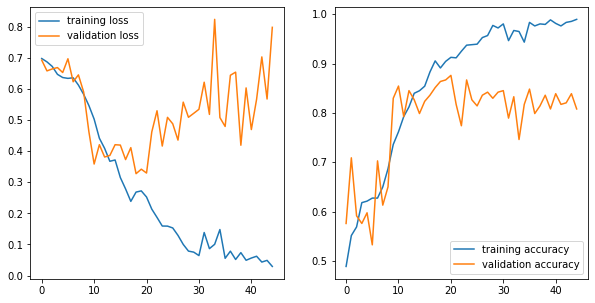

In [84]:
# # visualizing loss and accuracy per epoch
# model14_train_loss = model14_history.history['loss']
# model14_train_acc = model14_history.history['acc']
# model14_val_loss = model14_history.history['val_loss']
# model14_val_acc = model14_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model14_history.epoch, y=model14_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model14_history.epoch, y=model14_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model14_history.epoch, y=model14_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model14_history.epoch, y=model14_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 14 Scores: </b>
* Training Loss : 0.0051
* Training Accuracy : 0.9990
* Validation Loss : 0.7976
* Validation Accuracy : 0.8080

***

### CNN Model Iteration 15

For this Iteration my main goal is to continue reducing overfitting. <br>

Changes Made: 
- Added L2 kernel regulizers to the Convolutional layers
- So there will be dropout layers AND kernel regularizers

In [85]:
# model15 = models.Sequential()

# # Stack 1
# model15.add(layers.Conv2D(filters = 64,
#                          kernel_size=(3,3),
#                          activation='relu',
#                          input_shape = (global_target_size[0],global_target_size[0], 3),
#                          padding = 'same',
#                           kernel_regularizer = tf.keras.regularizers.L2(0.01)
#                         ))
# model15.add(layers.MaxPooling2D(pool_size = (4,4),
#                          padding = 'same'))

# # Stack 2
# model15.add(layers.Conv2D(32, (3,3), activation='relu',padding = 'same',
#                           kernel_regularizer = tf.keras.regularizers.L2(0.01)))
# model15.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))



# # Stack 3
# model15.add(layers.Conv2D(64, (4,4), activation='relu',
#                           kernel_regularizer = tf.keras.regularizers.L2(0.01)))
# model15.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))
# # Dropout Layer 1
# model15.add(layers.Dropout(.1))

# # Stack 4
# model15.add(layers.Conv2D(128, (3,3), activation='relu',padding='same',
#                           kernel_regularizer = tf.keras.regularizers.L2(0.01)))
# model15.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Dropout Layer 2
# model15.add(layers.Dropout(.25))

# # Stack 5
# model15.add(layers.Conv2D(128, (4,4), activation='relu',padding = 'same',
#                           kernel_regularizer = tf.keras.regularizers.L2(0.01)))
# model15.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))
# # Dropout Layer 2
# model15.add(layers.Dropout(.4))

# # Stack 5
# model15.add(layers.Conv2D(256, (4,4), activation='relu',padding = 'same',
#                           kernel_regularizer = tf.keras.regularizers.L2(0.01)))
# model15.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))


# # Flattening layer
# model15.add(layers.Flatten())

# # Dense layer 1
# model15.add(layers.Dense(64, activation='relu'))

# # Dense layer 2 - output layer
# model15.add(layers.Dense(1, activation='sigmoid'))

# model15.compile(loss='binary_crossentropy',
#               optimizer = 'adam',
#               metrics=['acc'])

In [86]:
# model15_history = model15.fit(train_data,
#                     epochs=global_epochs,
#                     validation_data = val_data
#                    )

Epoch 1/45
31/31 [==============================] - 43s 1s/step - loss: 2.6597 - acc: 0.5041 - val_loss: 1.1203 - val_acc: 0.5232
Epoch 2/45
31/31 [==============================] - 42s 1s/step - loss: 0.8740 - acc: 0.5226 - val_loss: 0.7438 - val_acc: 0.5232
Epoch 3/45
31/31 [==============================] - 43s 1s/step - loss: 0.7142 - acc: 0.5226 - val_loss: 0.6988 - val_acc: 0.5232
Epoch 4/45
31/31 [==============================] - 43s 1s/step - loss: 0.6957 - acc: 0.5226 - val_loss: 0.6932 - val_acc: 0.5232
Epoch 5/45
31/31 [==============================] - 42s 1s/step - loss: 0.6928 - acc: 0.5226 - val_loss: 0.6923 - val_acc: 0.5232
Epoch 6/45
31/31 [==============================] - 42s 1s/step - loss: 0.6924 - acc: 0.5226 - val_loss: 0.6922 - val_acc: 0.5232
Epoch 7/45
31/31 [==============================] - 42s 1s/step - loss: 0.6922 - acc: 0.5226 - val_loss: 0.6921 - val_acc: 0.5232
Epoch 8/45
31/31 [==============================] - 42s 1s/step - loss: 0.6923 - acc: 0.52

In [87]:
# model_15_train_results = model15.evaluate(train_data)
# model_15_train_results

# model_15_val_results = model15.evaluate(val_data)
# model_15_val_results

11/11 [==============================] - 6s 544ms/step - loss: 0.6921 - acc: 0.5232


[0.6920997500419617, 0.5232198238372803]

In [88]:
# score_dictionary['model 15'] = (model_15_train_results, model_15_val_results)

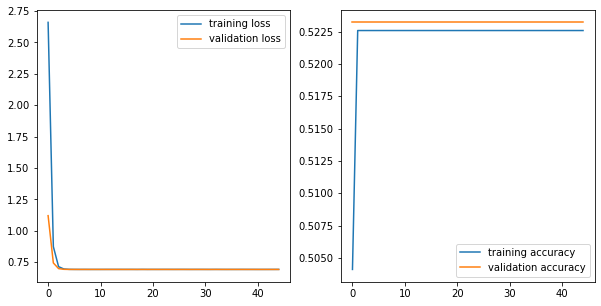

In [89]:
# # visualizing loss and accuracy per epoch
# model15_train_loss = model15_history.history['loss']
# model15_train_acc = model15_history.history['acc']
# model15_val_loss = model15_history.history['val_loss']
# model15_val_acc = model15_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model15_history.epoch, y=model15_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model15_history.epoch, y=model15_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model15_history.epoch, y=model15_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model15_history.epoch, y=model15_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 15 Scores: </b>
* Training Loss : 0.6921
* Training Accuracy : 0.5226
* Validation Loss : 0.6921
* Validation Accuracy : 0.5232 <br>
Oh No!  I added too much regularization! It happens, learning moment!
***

### CNN Model Iteration 16

For this Iteration my main goal is to continue reducing overfitting. <br>

Changes Made: 
- Experimenting with swish activation vs ReLu
- Reusing model 14 architecture because it gave me the highest validation score so far

In [90]:
# model16 = models.Sequential() 

# # Stack 1
# model16.add(layers.Conv2D(filters = 64,
#                          kernel_size=(3,3),
#                          activation='swish',
#                          input_shape = (global_target_size[0],global_target_size[0], 3),
#                          padding = 'same'
#                         ))
# model16.add(layers.MaxPooling2D(pool_size = (4,4),
#                          padding = 'same'))

# # Dropout Layer 1
# model16.add(layers.Dropout(.25))

# # Stack 2
# model16.add(layers.Conv2D(32, (3,3), activation='swish',padding = 'same'))
# model16.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Dropout Layer 2
# model16.add(layers.Dropout(.3))

# # Stack 3
# model16.add(layers.Conv2D(64, (4,4), activation='swish'))
# model16.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))
# # Dropout Layer 3
# model16.add(layers.Dropout(.3))

# # Stack 4
# model16.add(layers.Conv2D(128, (3,3), activation='swish',padding='same'))
# model16.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Dropout Layer 4
# model16.add(layers.Dropout(.35))

# # Stack 5
# model16.add(layers.Conv2D(128, (4,4), activation='swish',padding = 'same'))
# model16.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))
# # Dropout Layer 5
# model16.add(layers.Dropout(.5))

# # Stack 5
# model16.add(layers.Conv2D(256, (4,4), activation='swish',padding = 'same'))
# model16.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Dropout Layer 6
# model16.add(layers.Dropout(.5))


# # Flattening layer
# model16.add(layers.Flatten())

# # Dense layer 1
# model16.add(layers.Dense(64, activation='swish'))

# # Dense layer 2 - output layer
# model16.add(layers.Dense(1, activation='sigmoid'))

# model16.compile(loss='binary_crossentropy',
#               optimizer = 'adam',
#               metrics=['acc'])

In [91]:
# model16_history = model16.fit(train_data,
#                     epochs=global_epochs,
#                     validation_data = val_data
#                    )

Epoch 1/45
31/31 [==============================] - 50s 2s/step - loss: 0.6920 - acc: 0.4959 - val_loss: 0.6846 - val_acc: 0.5232
Epoch 2/45
31/31 [==============================] - 49s 2s/step - loss: 0.6916 - acc: 0.5246 - val_loss: 0.6918 - val_acc: 0.5263
Epoch 3/45
31/31 [==============================] - 49s 2s/step - loss: 0.6915 - acc: 0.5205 - val_loss: 0.6759 - val_acc: 0.5387
Epoch 4/45
31/31 [==============================] - 49s 2s/step - loss: 0.6730 - acc: 0.5924 - val_loss: 0.6752 - val_acc: 0.6842
Epoch 5/45
31/31 [==============================] - 49s 2s/step - loss: 0.6623 - acc: 0.6386 - val_loss: 0.6387 - val_acc: 0.6316
Epoch 6/45
31/31 [==============================] - 49s 2s/step - loss: 0.6219 - acc: 0.6858 - val_loss: 0.5427 - val_acc: 0.7214
Epoch 7/45
31/31 [==============================] - 49s 2s/step - loss: 0.5833 - acc: 0.6971 - val_loss: 0.5526 - val_acc: 0.6873
Epoch 8/45
31/31 [==============================] - 49s 2s/step - loss: 0.5232 - acc: 0.73

In [92]:
# model_16_train_results = model16.evaluate(train_data)
# model_16_train_results

# model_16_val_results = model16.evaluate(val_data)
# model_16_val_results

11/11 [==============================] - 6s 586ms/step - loss: 0.6914 - acc: 0.7802


[0.6914202570915222, 0.7801857590675354]

In [93]:
# score_dictionary['model 16'] = (model_16_train_results, model_16_val_results)

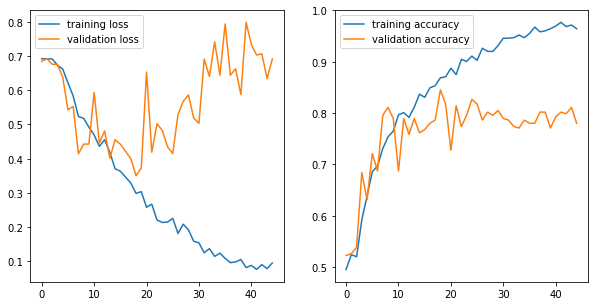

In [94]:
# # visualizing loss and accuracy per epoch
# model16_train_loss = model16_history.history['loss']
# model16_train_acc = model16_history.history['acc']
# model16_val_loss = model16_history.history['val_loss']
# model16_val_acc = model16_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model16_history.epoch, y=model16_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model16_history.epoch, y=model16_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model16_history.epoch, y=model16_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model16_history.epoch, y=model16_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 16 Scores: </b>
* Training Loss : 0.0191
* Training Accuracy : 0.9959
* Validation Loss : 0.6914
* Validation Accuracy : 0.7802 <br>

***

### CNN Model Iteration 17 

For this Iteration my final main goal is to continue reducing overfitting. <br>

Changes Made: 
- I am creating a new ImageDataGenerator Object that augments the training data, but not the validation data in hopes that adding more augmented data will help train the model to pick up on patterns in the image as opposed to just memorizing the images in the test set.
- We will be testing this on model 14's architecture to see if it makes a difference.


In [95]:
# train_generator_aug = ImageDataGenerator(rescale=1./255,
#                                          validation_split = .25,
#                                         horizontal_flip = True,
#                                         zoom_range=0.5,
#                                         )

In [96]:
# val_generator_aug = ImageDataGenerator(rescale=1./255,
#                                          validation_split = .25)

In [97]:
# train_data_aug = train_generator_aug.flow_from_directory(train_images_dir,  
#                                                      target_size = global_target_size,
#                                                      subset='training',
#                                                      batch_size=global_batch_size,
#                                                      class_mode='binary',
#                                                     shuffle = True,
#                                                     seed = 42)

Found 974 images belonging to 2 classes.


In [98]:
# val_data_aug = val_generator_aug.flow_from_directory(train_images_dir,  
#                                                      target_size = global_target_size,
#                                                      subset='validation',
#                                                      batch_size=global_batch_size,
#                                                      class_mode='binary',
#                                                     shuffle = True,
#                                                     seed = 42)

Found 323 images belonging to 2 classes.


In [99]:
# model17 = models.Sequential()

# # Stack 1
# model17.add(layers.Conv2D(filters = 64,
#                          kernel_size=(3,3),
#                          activation='relu',
#                          input_shape = (global_target_size[0],global_target_size[0], 3),
#                          padding = 'same'
#                         ))
# model17.add(layers.MaxPooling2D(pool_size = (4,4),
#                          padding = 'same'))

# # Dropout Layer 1
# model17.add(layers.Dropout(.25))

# # Stack 2
# model17.add(layers.Conv2D(32, (3,3), activation='relu',padding = 'same'))
# model17.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Dropout Layer 2
# model17.add(layers.Dropout(.3))

# # Stack 3
# model17.add(layers.Conv2D(64, (4,4), activation='relu'))
# model17.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))
# # Dropout Layer 3
# model17.add(layers.Dropout(.3))

# # Stack 4
# model17.add(layers.Conv2D(128, (3,3), activation='relu',padding='same'))
# model17.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Dropout Layer 4
# model17.add(layers.Dropout(.35))

# # Stack 5
# model17.add(layers.Conv2D(128, (4,4), activation='relu',padding = 'same'))
# model17.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))
# # Dropout Layer 5
# model17.add(layers.Dropout(.5))

# # Stack 5
# model17.add(layers.Conv2D(256, (4,4), activation='relu',padding = 'same'))
# model17.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Dropout Layer 6
# model17.add(layers.Dropout(.5))


# # Flattening layer
# model17.add(layers.Flatten())

# # Dense layer 1
# model17.add(layers.Dense(64, activation='relu'))

# # Dense layer 2 - output layer
# model17.add(layers.Dense(1, activation='sigmoid'))

# model17.compile(loss='binary_crossentropy',
#               optimizer = 'adam',
#               metrics=['acc'])

In [100]:
# model17_history = model17.fit(train_data_aug,
#                     epochs=global_epochs,
#                     validation_data = val_data_aug
#                    )

Epoch 1/45
31/31 [==============================] - 48s 2s/step - loss: 0.6983 - acc: 0.5164 - val_loss: 0.6929 - val_acc: 0.5232
Epoch 2/45
31/31 [==============================] - 46s 1s/step - loss: 0.6931 - acc: 0.5216 - val_loss: 0.6923 - val_acc: 0.5232
Epoch 3/45
31/31 [==============================] - 47s 2s/step - loss: 0.6940 - acc: 0.5226 - val_loss: 0.6925 - val_acc: 0.5232
Epoch 4/45
31/31 [==============================] - 47s 2s/step - loss: 0.6922 - acc: 0.5226 - val_loss: 0.6921 - val_acc: 0.5232
Epoch 5/45
31/31 [==============================] - 47s 2s/step - loss: 0.6927 - acc: 0.5226 - val_loss: 0.6920 - val_acc: 0.5232
Epoch 6/45
31/31 [==============================] - 47s 2s/step - loss: 0.6906 - acc: 0.5226 - val_loss: 0.6854 - val_acc: 0.5232
Epoch 7/45
31/31 [==============================] - 47s 2s/step - loss: 0.6796 - acc: 0.5554 - val_loss: 0.6608 - val_acc: 0.5511
Epoch 8/45
31/31 [==============================] - 47s 2s/step - loss: 0.6935 - acc: 0.54

In [101]:
# model_17_train_results = model17.evaluate(train_data_aug)
# model_17_train_results

# model_17_val_results = model17.evaluate(val_data_aug)
# model_17_val_results

11/11 [==============================] - 6s 532ms/step - loss: 0.4176 - acc: 0.8142


[0.41763126850128174, 0.8142414689064026]

In [102]:
# score_dictionary['model 17'] = (model_17_train_results, model_17_val_results)

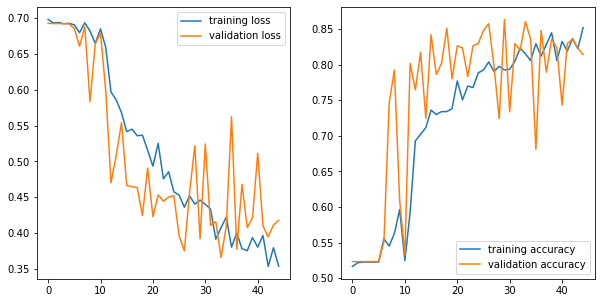

In [103]:
# # visualizing loss and accuracy per epoch
# model17_train_loss = model17_history.history['loss']
# model17_train_acc = model17_history.history['acc']
# model17_val_loss = model17_history.history['val_loss']
# model17_val_acc = model17_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model17_history.epoch, y=model17_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model17_history.epoch, y=model17_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model17_history.epoch, y=model17_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model17_history.epoch, y=model17_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 17 Scores: </b>
* Training Loss : 0.2939
* Training Accuracy : 0.8778
* Validation Loss : 0.4176
* Validation Accuracy : 0.8142 <br>

<b>Note:</b> This did reduce overfitting. I need to have it train for longer to be able to see its full effects. For now, it will not be my final model because I do not have the time to train it currently.
***

### CNN Model Iteration 18 

For this Iteration my final main goal is to continue reducing overfitting. <br>

Changes Made: 
- Reusing Model 5's Architecture
- Adding dropout between Convolutional Layers


In [104]:
model18 = models.Sequential()

# Stack 1
model18.add(layers.Conv2D(filters = 64,
                         kernel_size=(3,3),
                         activation='relu',
                         input_shape = (global_target_size[0],global_target_size[0], 3),
                         padding = 'same'
                        ))
model18.add(layers.MaxPooling2D(pool_size = (4,4),
                         padding = 'same'))

# Dropout Layer 1
model18.add(layers.Dropout(0.1))

# Stack 2
model18.add(layers.Conv2D(32, (3,3), activation='relu',padding = 'same'))
model18.add(layers.MaxPooling2D((2, 2),
                         padding = 'same'))

# Dropout Layer 2
model18.add(layers.Dropout(0.1))

# Stack 3
model18.add(layers.Conv2D(64, (4,4), activation='relu'))
model18.add(layers.MaxPooling2D((2, 2),
                         padding = 'same'))

# Stack 4
model18.add(layers.Conv2D(128, (3,3), activation='relu',padding='same'))
model18.add(layers.MaxPooling2D((2, 2),
                                padding = 'same'))

# Dropout Layer 3
model18.add(layers.Dropout(0.1))

# Stack 5
model18.add(layers.Conv2D(128, (4,4), activation='relu',padding = 'same'))
model18.add(layers.MaxPooling2D((2, 2),
                         padding = 'same'))

# Dropout Layer 4
model18.add(layers.Dropout(0.1))

# Stack 5
model18.add(layers.Conv2D(256, (4,4), activation='relu',padding = 'same'))
model18.add(layers.MaxPooling2D((2, 2),
                         padding = 'same'))

# Flattening layer
model18.add(layers.Flatten())

# Dense layer 1
model18.add(layers.Dense(64, activation='relu'))

# Dense layer 2 - output layer
model18.add(layers.Dense(1, activation='sigmoid'))

model18.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['acc'])

In [105]:
model18_history = model18.fit(train_data,
                    epochs=global_epochs,
                    validation_data = val_data
                   )

Epoch 1/45
31/31 [==============================] - 44s 1s/step - loss: 0.6942 - acc: 0.5041 - val_loss: 0.6929 - val_acc: 0.5232
Epoch 2/45
31/31 [==============================] - 43s 1s/step - loss: 0.6926 - acc: 0.5226 - val_loss: 0.6886 - val_acc: 0.5232
Epoch 3/45
31/31 [==============================] - 43s 1s/step - loss: 0.6941 - acc: 0.5226 - val_loss: 0.6927 - val_acc: 0.5232
Epoch 4/45
31/31 [==============================] - 43s 1s/step - loss: 0.6925 - acc: 0.5226 - val_loss: 0.6923 - val_acc: 0.5232
Epoch 5/45
31/31 [==============================] - 43s 1s/step - loss: 0.6926 - acc: 0.5298 - val_loss: 0.6922 - val_acc: 0.5232
Epoch 6/45
31/31 [==============================] - 43s 1s/step - loss: 0.6921 - acc: 0.5226 - val_loss: 0.6844 - val_acc: 0.5294
Epoch 7/45
31/31 [==============================] - 42s 1s/step - loss: 0.6746 - acc: 0.5832 - val_loss: 0.6537 - val_acc: 0.5573
Epoch 8/45
31/31 [==============================] - 43s 1s/step - loss: 0.6386 - acc: 0.67

In [106]:
model_18_train_results = model18.evaluate(train_data)
model_18_train_results

model_18_val_results = model18.evaluate(val_data)
model_18_val_results

11/11 [==============================] - 6s 543ms/step - loss: 0.7163 - acc: 0.8576


[0.7162983417510986, 0.8575851321220398]

In [107]:
score_dictionary['model 18'] = (model_18_train_results, model_18_val_results)

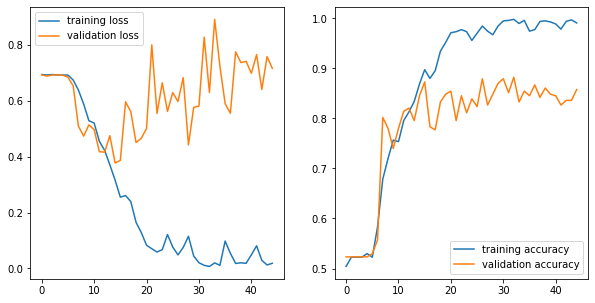

In [108]:
# visualizing loss and accuracy per epoch
model18_train_loss = model18_history.history['loss']
model18_train_acc = model18_history.history['acc']
model18_val_loss = model18_history.history['val_loss']
model18_val_acc = model18_history.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(x=model18_history.epoch, y=model18_train_loss, ax=ax1, label='training loss')
sns.lineplot(x=model18_history.epoch, y=model18_train_acc, ax=ax2, label='training accuracy')

sns.lineplot(x=model18_history.epoch, y=model18_val_loss, ax=ax1, label='validation loss')
sns.lineplot(x=model18_history.epoch, y=model18_val_acc, ax=ax2, label='validation accuracy');

In [109]:
# for key,value in score_dictionary.items():
#     print(key, value)

baseline ([0.2252783328294754, 0.9373716711997986], [0.6224871873855591, 0.7213622331619263])
model 1 ([0.5295901894569397, 0.755646824836731], [0.6159648895263672, 0.6253870129585266])
model 2 ([0.5317569971084595, 0.7535934448242188], [0.5476822853088379, 0.7337461113929749])
model 3 ([6.590195698663592e-05, 1.0], [1.7566325664520264, 0.7801857590675354])
model 4 ([3.625229146564379e-05, 1.0], [1.5266472101211548, 0.8390092849731445])
model 5 ([6.80778430250939e-06, 1.0], [1.5002049207687378, 0.8204334378242493])
model 6 ([0.6922218203544617, 0.522587239742279], [0.6921829581260681, 0.5232198238372803])
model 7 ([0.11006294935941696, 0.9794661402702332], [0.4457009732723236, 0.8235294222831726])
model 8 ([0.37588202953338623, 0.9117043018341064], [0.7981122136116028, 0.727554202079773])
model 10 ([0.00046964644570834935, 1.0], [2.7100117206573486, 0.693498432636261])
model 11 ([0.00038148375460878015, 1.0], [1.3042951822280884, 0.7956656217575073])
model 12 ([0.025757642462849617, 0.

<b> CNN 18 Scores: </b>
* Training Loss : 0.0021
* Training Accuracy : 1.0000
* Validation Loss : 0.7163
* Validation Accuracy : 0.8576 <br>

<b> Model 18 is my final Model </b> 